In [1]:
import argparse
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

import torch
import numpy as np 

from preprocess import get_mnist, get_webcam
from train import TrainerVaDE

In [2]:
class Args:
    batch_size = 128
    lr = 1e-6
    dataset = 'webcam'
    patience = 50
    pretrain = True
    epochs = 500


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    
args = Args() # Parsing all the arguments for the training
if args.dataset == 'mnist':
    dataloader_train, dataloader_test = get_mnist(args)
    n_classes = 10
else:
    dataloader_train, dataloader_test = get_webcam(args)
    n_classes = 31

In [3]:
vade = TrainerVaDE(args, device, dataloader_train, dataloader_test, n_classes)

In [4]:
if args.dataset == 'webcam':
    classes = ['back_pack',
                'bike',
                'bike_helmet',
                'bookcase',
                'bottle',
                'calculator',
                'desk_chair',
                'desk_lamp',
                'desktop_computer',
                'file_cabinet',
                'headphones',
                'keyboard',
                'laptop_computer',
                'letter_tray',
                'mobile_phone',
                'monitor',
                'mouse',
                'mug',
                'paper_notebook',
                'pen',
                'phone',
                'printer',
                'projector',
                'punchers',
                'ring_binder',
                'ruler',
                'scissors',
                'speaker',
                'stapler',
                'tape_dispenser',
                'trash_can']
else:
    classes = ['0',
               '1',
               '2',
               '3',
               '4',
               '5',
               '6',
               '7',
               '8',
               '9']


def get_latent_space(dataloader, z_dim, model, device, ftr_ext=None):
    z = torch.zeros((1, z_dim)).float().to(device)
    y = torch.zeros((1)).long().to(device)
    with torch.no_grad():
        for img, label in dataloader:
            img, label = img.to(device).float(), label.to(device).long()
            if ftr_ext is not None:
                img = ftr_ext(img); img = img.detach()

            mu, log_var = model.encode(img)
            z_l = model.reparameterize(mu, log_var)
            y = torch.cat((y, label), dim=0)
            z = torch.cat((z, z_l), dim=0)
    return z[1:], y[1:]


def plot_tsne(X_embedded, y, ticks, dataset):
    f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(15,10))

    cmap = plt.get_cmap('jet', 31)


    cax = ax1.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y.numpy(),
                      s=15, cmap=cmap)

    cbar = f.colorbar(cax, ticks=np.linspace(0,30,31))
    cbar.ax.set_yticklabels(ticks)

    ax1.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)
    plt.savefig('weights/vade_tsne_{}'.format(dataset))

    plt.show()

In [5]:
vade.train()

Training VaDE...
Testing VaDE... Epoch: -1, Loss: 15939.478515625, Acc: 47.31182795698925


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Training VaDE... Epoch: 0, Loss: 15460.177083333334
Testing VaDE... Epoch: 0, Loss: 15890.80078125, Acc: 50.53763440860215
Training VaDE... Epoch: 1, Loss: 15438.411458333334
Testing VaDE... Epoch: 1, Loss: 15861.3564453125, Acc: 51.61290322580645
Training VaDE... Epoch: 2, Loss: 15282.031087239584
Testing VaDE... Epoch: 2, Loss: 15735.9853515625, Acc: 51.61290322580645
Training VaDE... Epoch: 3, Loss: 15237.377278645834
Testing VaDE... Epoch: 3, Loss: 15692.0849609375, Acc: 48.38709677419355
Training VaDE... Epoch: 4, Loss: 15172.18994140625
Testing VaDE... Epoch: 4, Loss: 15678.349609375, Acc: 49.46236559139785
Training VaDE... Epoch: 5, Loss: 15100.368977864584
Testing VaDE... Epoch: 5, Loss: 15543.0498046875, Acc: 51.61290322580645
Training VaDE... Epoch: 6, Loss: 15046.281901041666
Testing VaDE... Epoch: 6, Loss: 15518.1640625, Acc: 47.31182795698925
Training VaDE... Epoch: 7, Loss: 14966.114908854166
Testing VaDE... Epoch: 7, Loss: 15461.66015625, Acc: 48.38709677419355
Training 

Training VaDE... Epoch: 66, Loss: 12608.885091145834
Testing VaDE... Epoch: 66, Loss: 13208.44140625, Acc: 49.46236559139785
Training VaDE... Epoch: 67, Loss: 12626.884602864584
Testing VaDE... Epoch: 67, Loss: 13175.9033203125, Acc: 50.53763440860215
Training VaDE... Epoch: 68, Loss: 12589.170572916666
Testing VaDE... Epoch: 68, Loss: 13170.6376953125, Acc: 52.68817204301075
Training VaDE... Epoch: 69, Loss: 12520.2861328125
Testing VaDE... Epoch: 69, Loss: 13175.34765625, Acc: 47.31182795698925
Training VaDE... Epoch: 70, Loss: 12510.875813802084
Testing VaDE... Epoch: 70, Loss: 13088.7783203125, Acc: 50.53763440860215
Training VaDE... Epoch: 71, Loss: 12498.72314453125
Testing VaDE... Epoch: 71, Loss: 13053.810546875, Acc: 53.76344086021505
Training VaDE... Epoch: 72, Loss: 12480.501139322916
Testing VaDE... Epoch: 72, Loss: 13126.2890625, Acc: 47.31182795698925
Training VaDE... Epoch: 73, Loss: 12467.242350260416
Testing VaDE... Epoch: 73, Loss: 13062.78515625, Acc: 50.537634408602

Training VaDE... Epoch: 131, Loss: 11667.668782552084
Testing VaDE... Epoch: 131, Loss: 12296.98828125, Acc: 50.53763440860215
Training VaDE... Epoch: 132, Loss: 11660.541666666666
Testing VaDE... Epoch: 132, Loss: 12299.431640625, Acc: 51.61290322580645
Training VaDE... Epoch: 133, Loss: 11683.989583333334
Testing VaDE... Epoch: 133, Loss: 12295.732421875, Acc: 50.53763440860215
Training VaDE... Epoch: 134, Loss: 11662.084798177084
Testing VaDE... Epoch: 134, Loss: 12234.5068359375, Acc: 50.53763440860215
Training VaDE... Epoch: 135, Loss: 11607.53857421875
Testing VaDE... Epoch: 135, Loss: 12232.568359375, Acc: 50.53763440860215
Training VaDE... Epoch: 136, Loss: 11593.338704427084
Testing VaDE... Epoch: 136, Loss: 12304.5791015625, Acc: 49.46236559139785
Training VaDE... Epoch: 137, Loss: 11650.65966796875
Testing VaDE... Epoch: 137, Loss: 12202.58203125, Acc: 50.53763440860215
Training VaDE... Epoch: 138, Loss: 11703.223795572916
Testing VaDE... Epoch: 138, Loss: 12198.5830078125, 

Testing VaDE... Epoch: 195, Loss: 11915.2421875, Acc: 50.53763440860215
Training VaDE... Epoch: 196, Loss: 11308.039225260416
Testing VaDE... Epoch: 196, Loss: 11979.732421875, Acc: 50.53763440860215
Training VaDE... Epoch: 197, Loss: 11298.388509114584
Testing VaDE... Epoch: 197, Loss: 11864.712890625, Acc: 51.61290322580645
Training VaDE... Epoch: 198, Loss: 11304.708333333334
Testing VaDE... Epoch: 198, Loss: 12013.400390625, Acc: 48.38709677419355
Training VaDE... Epoch: 199, Loss: 11245.034342447916
Testing VaDE... Epoch: 199, Loss: 11904.330078125, Acc: 50.53763440860215
Training VaDE... Epoch: 200, Loss: 11261.111653645834
Testing VaDE... Epoch: 200, Loss: 11930.7451171875, Acc: 48.38709677419355
Training VaDE... Epoch: 201, Loss: 11329.501627604166
Testing VaDE... Epoch: 201, Loss: 11935.7666015625, Acc: 50.53763440860215
Training VaDE... Epoch: 202, Loss: 11325.411946614584
Testing VaDE... Epoch: 202, Loss: 11846.0810546875, Acc: 49.46236559139785
Training VaDE... Epoch: 203, 

Training VaDE... Epoch: 260, Loss: 11147.624674479166
Testing VaDE... Epoch: 260, Loss: 11760.765625, Acc: 49.46236559139785
Training VaDE... Epoch: 261, Loss: 11126.084309895834
Testing VaDE... Epoch: 261, Loss: 11714.935546875, Acc: 49.46236559139785
Training VaDE... Epoch: 262, Loss: 11107.84375
Testing VaDE... Epoch: 262, Loss: 11768.5703125, Acc: 48.38709677419355
Training VaDE... Epoch: 263, Loss: 11103.355631510416
Testing VaDE... Epoch: 263, Loss: 11709.0458984375, Acc: 50.53763440860215
Training VaDE... Epoch: 264, Loss: 11076.426106770834
Testing VaDE... Epoch: 264, Loss: 11765.283203125, Acc: 49.46236559139785
Training VaDE... Epoch: 265, Loss: 11139.716634114584
Testing VaDE... Epoch: 265, Loss: 11777.859375, Acc: 52.68817204301075
Training VaDE... Epoch: 266, Loss: 11138.591634114584
Testing VaDE... Epoch: 266, Loss: 11771.126953125, Acc: 47.31182795698925
Training VaDE... Epoch: 267, Loss: 11160.80908203125
Testing VaDE... Epoch: 267, Loss: 11807.6689453125, Acc: 51.61290

Testing VaDE... Epoch: 324, Loss: 11657.123046875, Acc: 52.68817204301075
Training VaDE... Epoch: 325, Loss: 11035.270182291666
Testing VaDE... Epoch: 325, Loss: 11694.935546875, Acc: 49.46236559139785
Training VaDE... Epoch: 326, Loss: 11080.472819010416
Testing VaDE... Epoch: 326, Loss: 11705.9384765625, Acc: 49.46236559139785
Training VaDE... Epoch: 327, Loss: 11079.630859375
Testing VaDE... Epoch: 327, Loss: 11674.732421875, Acc: 48.38709677419355
Training VaDE... Epoch: 328, Loss: 11092.84326171875
Testing VaDE... Epoch: 328, Loss: 11655.4189453125, Acc: 53.76344086021505
Training VaDE... Epoch: 329, Loss: 11089.10888671875
Testing VaDE... Epoch: 329, Loss: 11689.7099609375, Acc: 53.76344086021505
Training VaDE... Epoch: 330, Loss: 11106.022786458334
Testing VaDE... Epoch: 330, Loss: 11691.369140625, Acc: 49.46236559139785
Training VaDE... Epoch: 331, Loss: 11069.218098958334
Testing VaDE... Epoch: 331, Loss: 11704.8173828125, Acc: 49.46236559139785
Training VaDE... Epoch: 332, Lo

Training VaDE... Epoch: 389, Loss: 11079.129720052084
Testing VaDE... Epoch: 389, Loss: 11670.435546875, Acc: 50.53763440860215
Training VaDE... Epoch: 390, Loss: 11107.797200520834
Testing VaDE... Epoch: 390, Loss: 11675.0361328125, Acc: 49.46236559139785
Training VaDE... Epoch: 391, Loss: 11033.4140625
Testing VaDE... Epoch: 391, Loss: 11656.2138671875, Acc: 49.46236559139785
Training VaDE... Epoch: 392, Loss: 11014.230794270834
Testing VaDE... Epoch: 392, Loss: 11664.6845703125, Acc: 49.46236559139785
Training VaDE... Epoch: 393, Loss: 10983.959147135416
Testing VaDE... Epoch: 393, Loss: 11660.912109375, Acc: 48.38709677419355
Training VaDE... Epoch: 394, Loss: 10990.387532552084
Testing VaDE... Epoch: 394, Loss: 11598.5791015625, Acc: 49.46236559139785
Training VaDE... Epoch: 395, Loss: 11040.270345052084
Testing VaDE... Epoch: 395, Loss: 11646.615234375, Acc: 50.53763440860215
Training VaDE... Epoch: 396, Loss: 10982.611165364584
Testing VaDE... Epoch: 396, Loss: 11591.6455078125,

Testing VaDE... Epoch: 453, Loss: 11629.6240234375, Acc: 50.53763440860215
Training VaDE... Epoch: 454, Loss: 11003.633138020834
Testing VaDE... Epoch: 454, Loss: 11621.46875, Acc: 50.53763440860215
Training VaDE... Epoch: 455, Loss: 10981.936360677084
Testing VaDE... Epoch: 455, Loss: 11658.4609375, Acc: 50.53763440860215
Training VaDE... Epoch: 456, Loss: 10997.724283854166
Testing VaDE... Epoch: 456, Loss: 11617.099609375, Acc: 49.46236559139785
Training VaDE... Epoch: 457, Loss: 11030.045084635416
Testing VaDE... Epoch: 457, Loss: 11577.677734375, Acc: 48.38709677419355
Training VaDE... Epoch: 458, Loss: 11022.3583984375
Testing VaDE... Epoch: 458, Loss: 11624.2646484375, Acc: 50.53763440860215
Training VaDE... Epoch: 459, Loss: 11016.03759765625
Testing VaDE... Epoch: 459, Loss: 11725.701171875, Acc: 47.31182795698925
Training VaDE... Epoch: 460, Loss: 10978.066569010416
Testing VaDE... Epoch: 460, Loss: 11630.49609375, Acc: 51.61290322580645
Training VaDE... Epoch: 461, Loss: 110

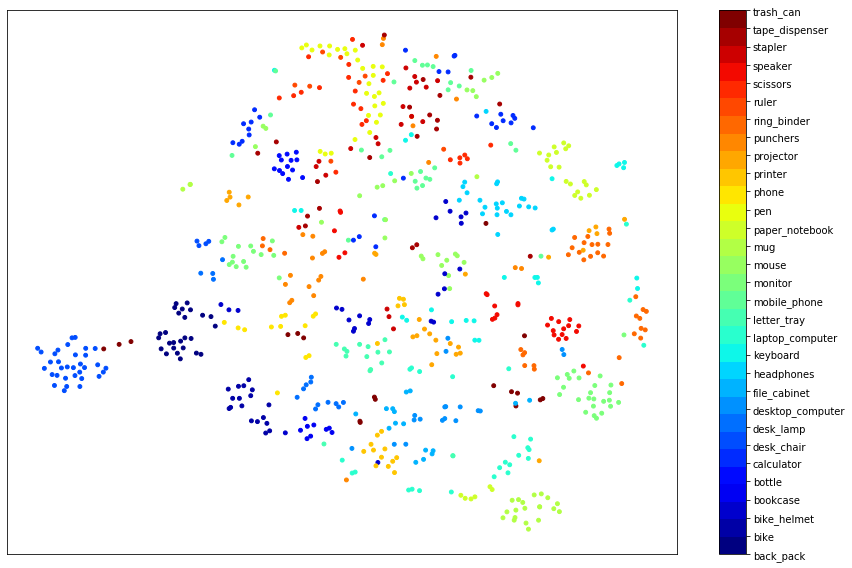

In [6]:
z_dim = 10
model = vade.VaDE
z, y = get_latent_space(dataloader_train, z_dim, model, device, vade.feature_extractor)
z, y = z.cpu(), y.cpu()
z_embedded = TSNE(n_components=2).fit_transform(z.detach().numpy())
plot_tsne(z_embedded, y, classes, args.dataset)

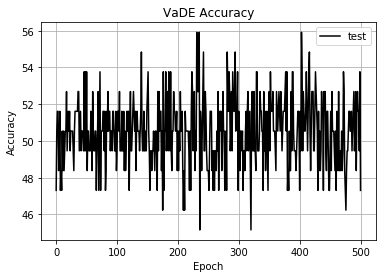

In [7]:
acc = np.array(vade.acc_t)

def plot_loss(values, metric, dataset):
    plt.plot(np.arange(len(values)), values, c='k', label='test')
    plt.title('VaDE {}'.format(metric))
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.grid(True)
    plt.savefig('weights/vade_{}_{}'.format(metric, dataset))

plot_loss(acc, 'Accuracy', args.dataset)

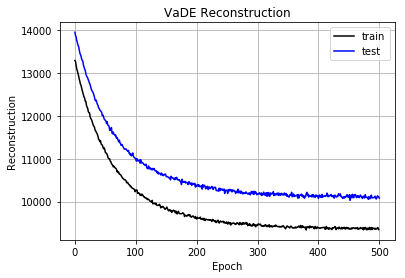

In [8]:
rec = np.array(vade.rec)
rec_t = np.array(vade.rec_t)
dkl_c = np.array(vade.dkl_c)
dkl_c_t = np.array(vade.dkl_c_t)
dkl_z = np.array(vade.dkl_z)
dkl_z_t = np.array(vade.dkl_z_t)

def plot_loss(values, values_t, metric, dataset):
    plt.plot(np.arange(len(values)), values, c='k', label='train')
    plt.plot(np.arange(len(values_t)), values_t, c='b', label='test')
    plt.title('VaDE {}'.format(metric))
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.grid(True)
    plt.savefig('weights/vade_{}_{}'.format(metric, dataset))

plot_loss(rec, rec_t, 'Reconstruction', args.dataset)

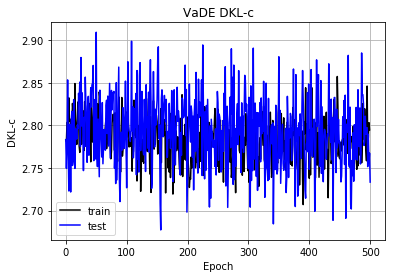

In [9]:
plot_loss(dkl_c, dkl_c_t, 'DKL-c', args.dataset)

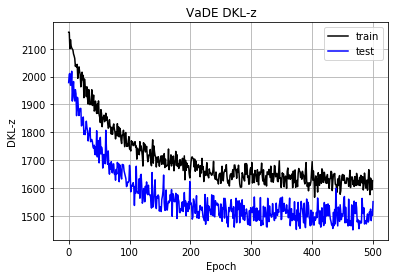

In [10]:
plot_loss(dkl_z, dkl_z_t, 'DKL-z', args.dataset)